In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load a stock dataset (you can replace this with your own dataset)
# For this example, we'll use Apple Inc. (AAPL) historical stock prices
# You can download the data from finance.yahoo.com or use any financial dataset you prefer
# Save the data in a CSV file and load it using pandas
data = pd.read_csv('AAPL.csv', date_parser=True)

C:\Users\haree\AppData\Local\Temp\ipykernel_3460\2233980756.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AAPL.csv', date_parser=True)


In [4]:
data = data[['Date', 'Close']]  # Use only Date and Closing Price columns

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
# Update the above line to use .loc to avoid the SettingWithCopyWarning
data.loc[:, 'Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
# Create sequences for training
sequence_length = 60  # Use 60 days of historical data to predict the next day
sequences = []
target = []



Epoch 1/25

6/6 [==============================] - 7s 39ms/step - loss: 0.2968
Epoch 2/25
6/6 [==============================] - 0s 40ms/step - loss: 0.0531
Epoch 3/25
6/6 [==============================] - 0s 37ms/step - loss: 0.0162
Epoch 4/25
6/6 [==============================] - 0s 37ms/step - loss: 0.0236
Epoch 5/25
6/6 [==============================] - 0s 68ms/step - loss: 0.0085
Epoch 6/25
6/6 [==============================] - 0s 43ms/step - loss: 0.0111
Epoch 7/25
6/6 [==============================] - 0s 46ms/step - loss: 0.0081
Epoch 8/25
6/6 [==============================] - 0s 44ms/step - loss: 0.0081
Epoch 9/25
6/6 [==============================] - 0s 42ms/step - loss: 0.0068
Epoch 10/25
6/6 [==============================] - 0s 63ms/step - loss: 0.0068
Epoch 11/25
6/6 [==============================] - 0s 44ms/step - loss: 0.0066
Epoch 12/25
6/6 [==============================] - 0s 40ms/step - loss: 0.0065
Epoch 13/25
6/6 [==============================] - 0s 44ms

KeyError: -1

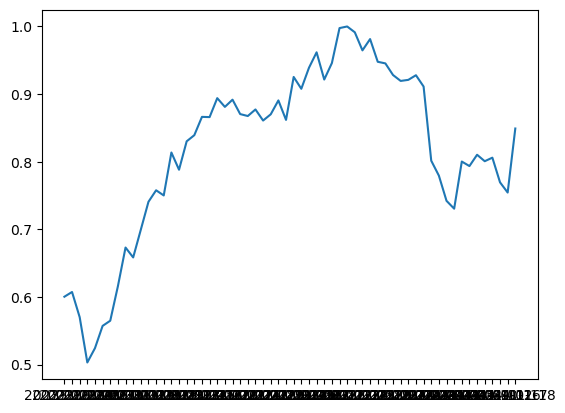

In [5]:

for i in range(len(data) - sequence_length):
    sequences.append(data['Close'].values[i:i+sequence_length])
    target.append(data['Close'].values[i+sequence_length])

# Convert lists to numpy arrays
sequences = np.array(sequences)
target = np.array(target)

# Reshape the data for LSTM input (samples, time steps, features)
sequences = sequences.reshape(sequences.shape[0], sequences.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequences.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(sequences, target, epochs=25, batch_size=32)

# Make predictions
test_data = data['Close'].values[-sequence_length:]
test_data = test_data.reshape(1, sequence_length, 1)
predicted_stock_price = model.predict(test_data)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)




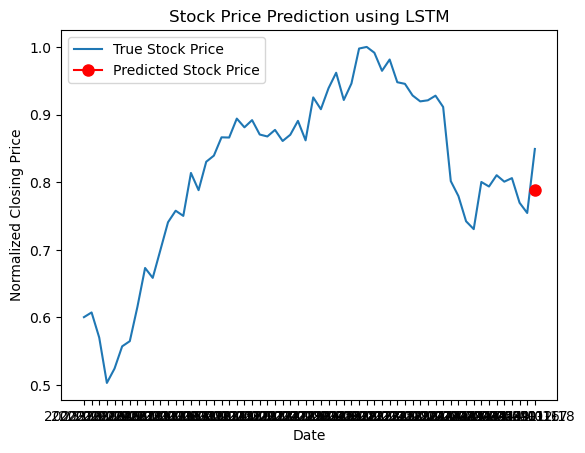

In [6]:
# Resetting the index to integers
data_reset = data.reset_index(drop=True)

# Visualize the results
plt.plot(data_reset['Date'][-sequence_length:], data_reset['Close'][-sequence_length:], label='True Stock Price')
plt.plot(data_reset['Date'].iloc[-1], predicted_stock_price[0][0], marker='o', markersize=8, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.legend()
plt.show()